# Analyzing Opportunity Youths in South Seattle

### Mapping King County w/ Opportunity Youth Population Figures

#### Load necessary packages

In [5]:
# make sure you are in oy-env environment
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

#### Create POSTGRES SQL engine

In [6]:
engine = create_engine("postgresql:///opportunity_youth")

#### Purpose

Opportunity Youth are defined as people aged 16 - 24 who are neither enrolled in school or working. They represent a vulnerable group of youth that face many challenges throughout their early life (and beyond). The Seattle Region Partnership (a multi-sector initiative founded by the Seattle Metropolitan Chamber of Commerce, Seattle Foundation, City of Seattle, and King County) has directed efforts to aid this group of youth, and our project looks to update current research with more up-to-date data. Opportunity Youth represent a group that could be helped with community programs and outreach. The l Census Public Use Microdata Sample (PUMS) data from 2014. The Road Map Project is a mast research publicly released on the topic is based upon a report from 2016 (made by the Road Map Project) that utilizes USulti-sector organization dedicated to addressing systemic barriers to racial equity, to help students succeed. In our research we used PUMS data from 2017.


##### Assumptions:
Opotunity youth are people aged 16-24 who are neither in school or working

#### Issues
There may be discrepancies in the definition the 2014 study used to determine what makes an opportunity youth from ours

#### Analysis Method:

We made SQL queries to parse through census data grouping by age (16-18, 19-21, and 22-24) and opportunity youth (opportunity youth, working without a diploma, and not an opportunity youth). We organized data, imported old data and compared them via bar charts. We also used puma data to create chlorepleth maps based on opportunity youth per region, jobs for under 29, and map of South King County.

#### Load necessary data and process for mapping

In [7]:
# Import Washington PUMA Data with GeoPandas Shape data in Geometry column
wa_puma = gpd.read_file("data/raw/tl_2017_53_puma10.shp") 

# Loads Opportunity Youth Population data obtained from a Postgresql database
oy_per_puma_df = pd.read_csv('data/processed/oy_per_puma.csv')

# Imports Job Availability for people under 29 years old by PUMA#
jobs_per_puma_df = pd.read_csv('data/processed/jobs_per_puma.csv')

# Converts PUMACE10 Column from string to integer
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)

# Selects all PUMA codes for King County (including Seattle) PUMAs and puts into Subset
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]

# List of PUMA #'s for S. Seattle and S. King County
skc_puma_list = [11604, 11605, 11610, 11611, 11612, 11613, 11614]

## Creates a new column, KCS and assigns a 1 if the PUMA is in S. King Country/S. Seattle, or 0 otherwise. This is
# used to map the gray portion of the figure
skc_puma = kc_puma.assign(SKC = [1 if row in skc_puma_list else 0 for row in kc_puma['PUMACE10']]) 

# inner join with KC data to make a SKC only subset with the OY Population Data Added
skc_chloro = pd.merge(skc_puma, oy_per_puma_df, on='PUMACE10', how='inner')

# inner join with jobs data, to map jobs available per PUMA region
skc_jobs_chloro = pd.merge(skc_puma, jobs_per_puma_df, on='PUMACE10', how='inner')

##### Visualization of South King County

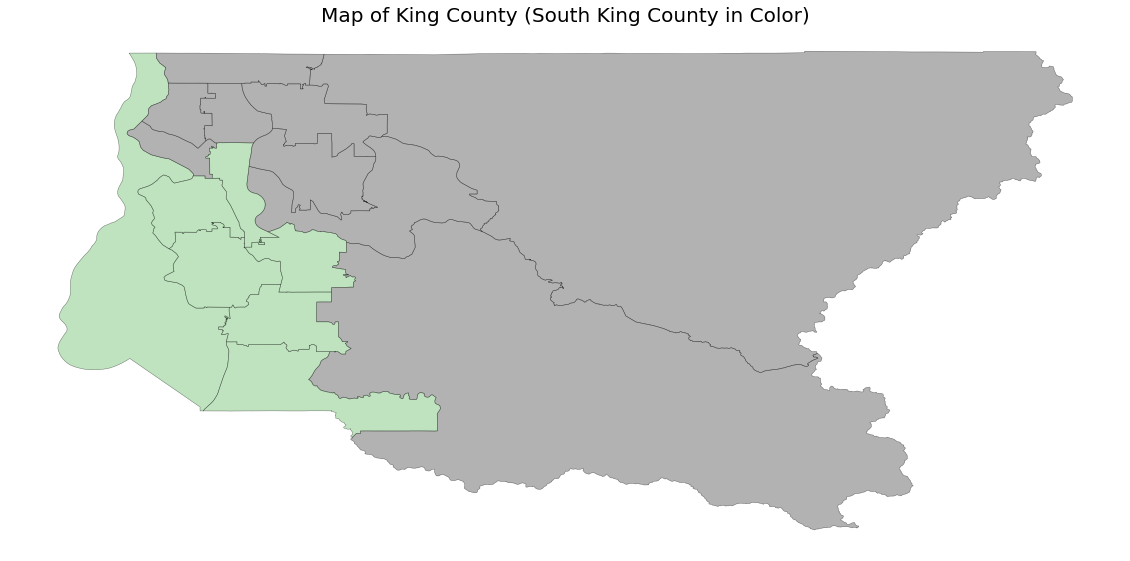

In [8]:
# Plots a map of King County, with South King County and South Seattle in color
fig, ax = plt.subplots(1, figsize=(20, 16))
ax = skc_puma.plot(ax=ax, 
              column='SKC', cmap='Accent_r', alpha = .5, linewidth=.5, edgecolor='black',  legend = False)
ax.set_title('Map of King County (South King County in Color)', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();

#### Chloropleth Map of South King County (with OY Population)

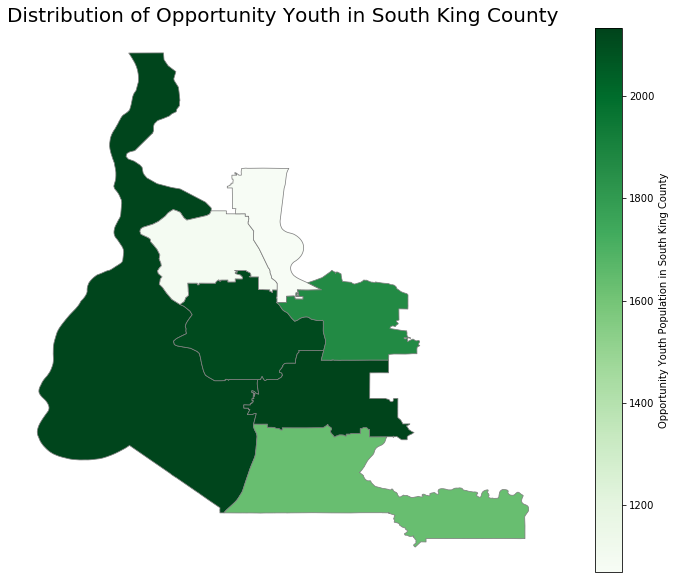

In [9]:
# Plots a map of King County, and South King County as a Chloropleth map with Opportunity Youth Population Data
# There are two plots, as we wanted the rest of King County to be another color than the chloropleth data
fig, ax = plt.subplots(1, figsize=(15, 10))
ax = skc_chloro.plot(ax=ax, 
              column='total_per_region', 
              alpha = 1, legend = True, 
              cmap= 'Greens',
              linewidth= 0.75,
              edgecolor = 'grey',
              legend_kwds={'label': "Opportunity Youth Population in South King County", 'orientation': "vertical"
                          })

ax.set_title('Distribution of Opportunity Youth in South King County', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.savefig('SKC OY Population.png', transparent = True, dpi = 150)
plt.show();

#### Chloropleth Map of South King County Job Availability Data

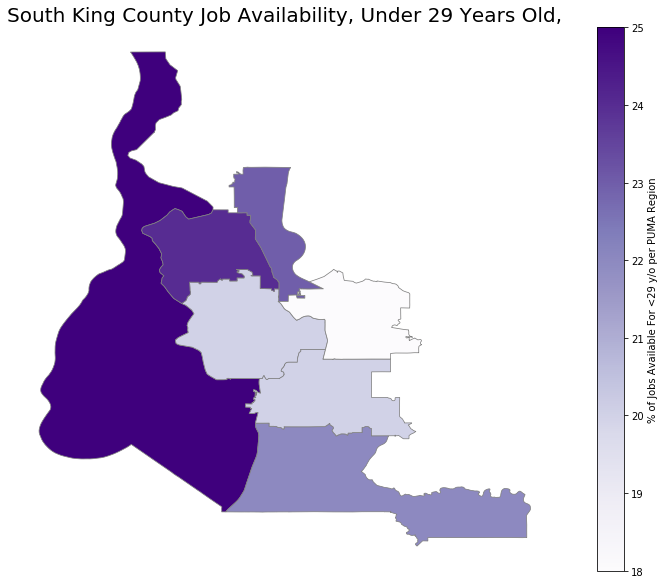

In [10]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax = skc_jobs_chloro.plot(ax=ax, 
              column = 'percentage_for_under_29 ', 
              alpha = 1, legend = True, 
              cmap= 'Purples',
              linewidth= 0.75,
              edgecolor = 'grey',
              legend_kwds={'label': "% of Jobs Available For <29 y/o per PUMA Region", 'orientation': "vertical"
                          })

ax.set_title('South King County Job Availability, Under 29 Years Old,', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();

#### Import and reorganize table identifying opportunity youth

In [11]:
# Import necessary table 1 data
table_oy = pd.read_csv('data/processed/table1.csv')
original = pd.read_csv('data/processed/original.csv')
# reorganize data based on tale order
shift = table_oy.copy()
for i in range (0, 3):
    temp1 = table_oy.loc[(i * 3) + 1].copy()
    temp2 = table_oy.loc[(i * 3) + 2].copy()
    shift.loc[(i * 3) + 1] = temp2
    shift.loc[(i * 3) + 2] = temp1
temp6 = table_oy.loc[6].copy()
temp8 = table_oy.loc[8].copy()
temp7 = table_oy.loc[7].copy()
shift.iloc[6] = temp8
shift.iloc[8] = temp6
shift.iloc[7] = temp7

#### Plot Data Related to Number of Opportunity Youth

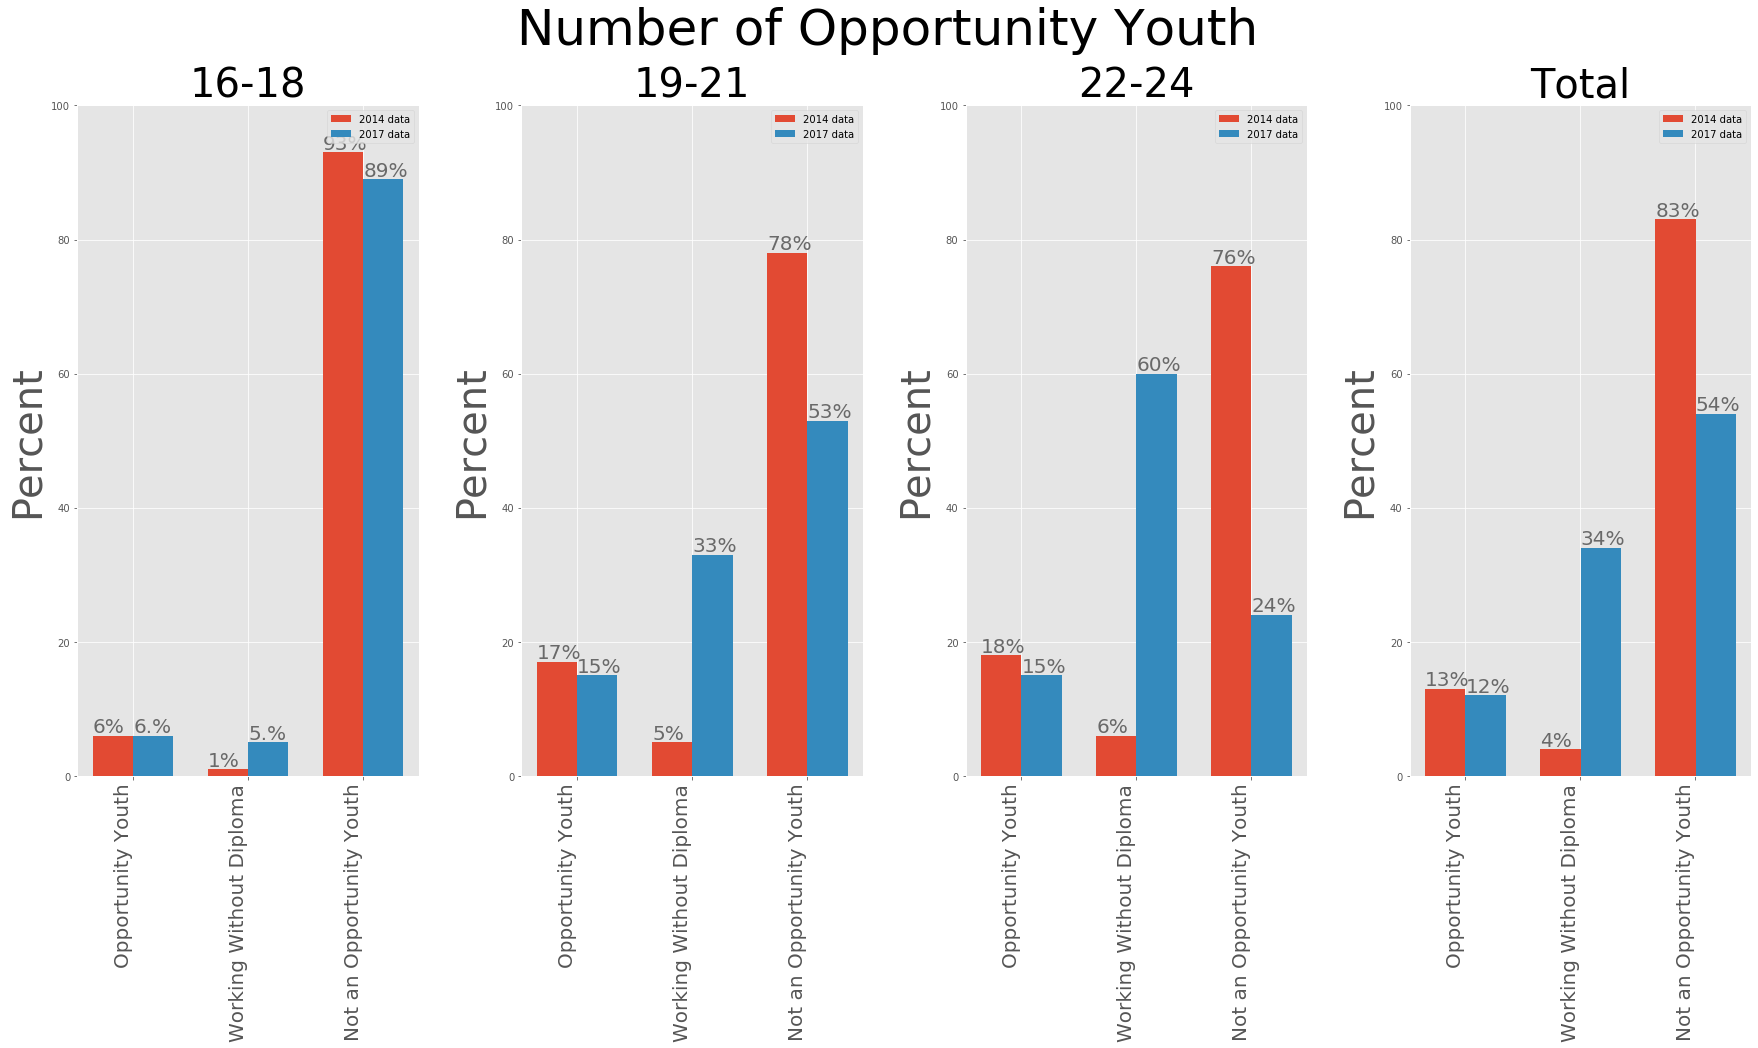

In [20]:
# Create overall figure
fig, ax = plt.subplots(1, 4, figsize = (30, 12.5))
plt.style.use('ggplot')
index = np.arange(3)
width = 0.35
plt.suptitle('Number of Opportunity Youth', fontsize= 50)
plt.subplots_adjust(wspace = 0.3, top = 0.87)
plt.setp(ax, xticks = [0.1725, 1.1725, 2.1725],
         xticklabels=['Opportunity Youth', 'Working Without Diploma', 'Not an Opportunity Youth'])
# Create individual plots
for i in range(0, 4):
    old = []
    new = []
    change = []
    if (i < 3):    
        ax[i].set_title(original['age_group'].iloc[i * 3], fontsize = 40)
        for j in range (0, 3):
            old.append(original['percent'].iloc[(i * 3) + j])
            new.append(shift['percent'].iloc[(i * 3) + j])
    else:
        ax[i].set_title('Total', fontsize = 40)
    if (i == 3):
        old = [13, 4, 83]
        new = [12 ,34, 54]
    ax[i].bar(index, old, width, label = '2014 data')
    ax[i].bar(index + width, new, width, label = '2017 data')
    ax[i].legend()
    ax[i].set_xlabel
    ax[i].set_ylabel('Percent', fontsize = 40)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 'vertical', horizontalalignment='right', fontsize = 20)
    ax[i].set_yticks([0, 20, 40, 60, 80, 100])
    for p in ax[i].patches:
        ax[i].text(p.get_x(), p.get_height()+.5, str(p.get_height())[:2] + '%', fontsize= 20,
        color='dimgrey')

#### Read SQL query the create dataframe (three age range and total) to create table of eductional level attainment of opportunity youth

In [13]:
sqlpath1618 = 'src/sql/table_2/oy_16_18.sql'
scriptFile1618 = open(sqlpath1618,'r')
script1618 = scriptFile1618.read()
df1618 = pd.read_sql(script1618, con = engine)

sqlpath1921 = 'src/sql/table_2/oy_19_21.sql'
scriptFile1921 = open(sqlpath1921,'r')
script1921 = scriptFile1921.read()
df1921 = pd.read_sql(script1921, con = engine)

sqlpath2224 = 'src/sql/table_2/oy_22_24.sql'
scriptFile2224 = open(sqlpath2224,'r')
script2224 = scriptFile2224.read()
df2224 = pd.read_sql(script2224, con = engine)

sqlpath_total = 'src/sql/table_2/oy_total.sql'
scriptFile_total = open(sqlpath_total,'r')
script_total = scriptFile_total.read()
df_total = pd.read_sql(script_total, con = engine)

#### Combine four dataframe 

In [14]:
df_oy_2017 = pd.concat([df1921.iloc[:,0:1], df1618.iloc[:,1:], df1921.iloc[:,1:], df2224.iloc[:,1:], df_total.iloc[:,1:]], axis=1)
# fill N/A value 0
df_oy_2017 = df_oy_2017.fillna(0) 
# set educational attainment as index
df_oy_2017['index'] = ['No diploma', 'HS diploma or GED', 'Some college, no degree', 'Degree (Associate or higher)']
df_oy_2017 = df_oy_2017.set_index('index')
del df_oy_2017['degree']
# change columns names
df_oy_2017.rename(columns={"popluation_16_18":"16-18 Population",
                           "ratio_16_18":"16-18 100%",
                           "popluation_19_21":"19-21 Population",
                           "ratio_19_21":"19-21 100%",
                           "popluation_22_24":"22-24 Population",
                           "ratio_22_24":"22-24 100%",
                           "popluation_total":"Total Population",
                           "ratio_total":"Total 100%",
                          }, inplace = True)

#### Create Percentage Table

In [15]:
temp = df_oy_2017.T.copy()
temp.drop(index=['16-18 100%','19-21 100%','22-24 100%','Total 100%'],inplace=True)
temp['Sum'] = temp.sum(axis=1)
for i in range(len(temp.keys())):
    for j in range(len(temp.index)):
        perc = 100 * temp.iloc[j,i] / temp.iloc[len(temp.index)-1,len(temp.keys())-1]
        temp.iloc[j,i] =round(perc, 0)
df_oy_2017_percent = temp.T.copy()
df_oy_2017_percent.rename(columns={"16-18 Population":"16-18",
                           "19-21 Population":"19-21",
                           "22-24 Population":"22-24",
                           "Total Population":"Total",
                          }, inplace = True)

#### Import old and new table 2 data 

In [16]:
df_oy_2014 = pd.read_csv('data/processed/oy_table_2014.csv')
df_oy_2014.set_index(df_oy_2014.columns[0], inplace=True)
df_oy_2014_percent = pd.read_csv('data/processed/oy_table_2014_percent.csv')
df_oy_2014_percent.set_index(df_oy_2014_percent.columns[0], inplace=True)


#### Plot data comparing educational attainment of opportunity youth comparing new and old data

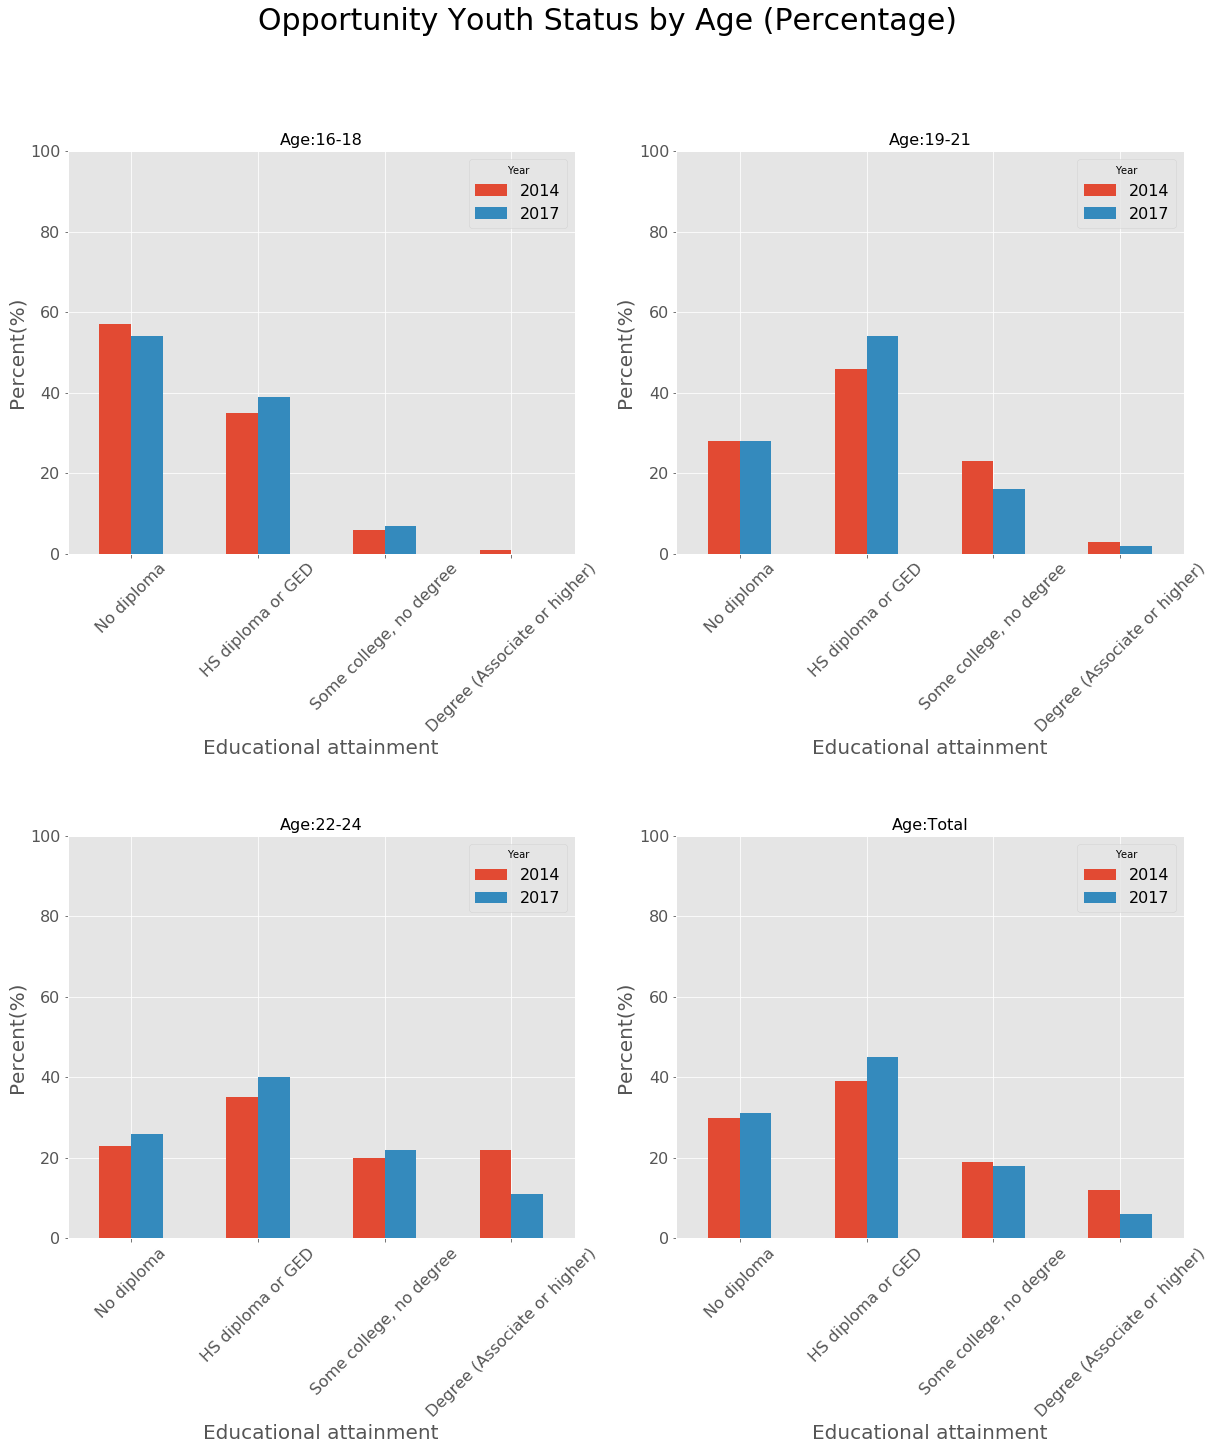

In [17]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Opportunity Youth Status by Age (Percentage)', fontsize=30)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

for i in range(0,4):
#     subplot row and column
    row = (i)//2
    col = i%2
    ax = axes[row][col]
    
#     import 2014 and 2017 table
    df = pd.concat([df_oy_2014.iloc[:,i+4],df_oy_2017.iloc[:,2*i+1]], axis=1)
#     df = pd.concat([df_oy_2014.iloc[:,i+4],df_oy_2017.iloc[:,2*i+1]], axis=1, ignore_index=True)
    df.plot.bar(ax=ax, fontsize=16)
    
#     age group title
    title = df_oy_2014.columns[i]
#     set title of each axes in different age 
    ax.set_title("Age:"+title.format(), fontsize=16)
#     set label and legend
    ax.set_xlabel('Educational attainment', fontsize=20)
    ax.set_ylabel('Percent(%)', fontsize=20)
    ax.legend(['2014','2017'], title='Year', fontsize=16)
#     rotate x labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylim(0, 100)
    

#### Calculate percentage change of opportunity youth status between 2014 and 2017

In [21]:
df_oy_diff_percent = pd.DataFrame()
col_list =['16-18', '19-21', '22-24', 'Total']
for col in col_list:
    df_oy_diff_percent[col] = df_oy_2017_percent[col] - df_oy_2014_percent[col]
df_oy_diff_percent.drop(index='Sum', inplace=True)

#### Visualize percentage change of opportunity youth status

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

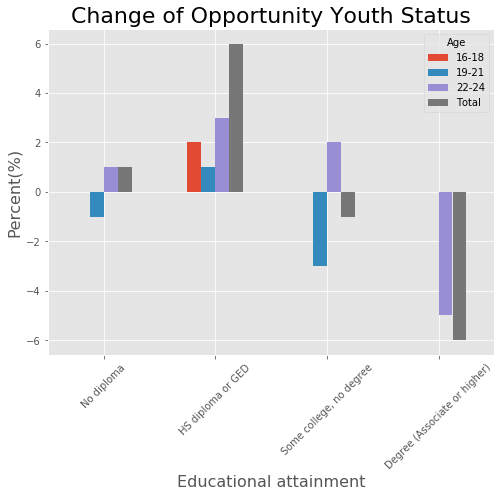

In [22]:
df_oy_diff_percent.plot.bar(figsize=(8,6))
plt.title('Change of Opportunity Youth Status',fontsize=22)
plt.xlabel('Educational attainment', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.legend(title='Age')
plt.xticks(rotation=45)

### To Do
Revisit definition of opportunity youth

Find what industries opportunity youths are empployed in